<a href="https://colab.research.google.com/github/lisbettildjuir/202055202106-Lisbet/blob/master/tugass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lisbettildjuir","key":"4f4c7cda7f22ca074afec9d04b4845a9"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Apr 13 02:22 kaggle.json


In [5]:
!pip install -q kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!pwd

/content


In [10]:
!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           5951        227  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           1770         42  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           1973         42  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [11]:
!kaggle datasets download -d petitbonney/cifar10-image-recognition

 99% 950M/961M [00:07<00:00, 120MB/s]
100% 961M/961M [00:07<00:00, 138MB/s]


In [12]:
!kaggle datasets download -d pankrzysiu/cifar10-python

 98% 318M/325M [00:01<00:00, 196MB/s]
100% 325M/325M [00:01<00:00, 179MB/s]


In [13]:
!kaggle datasets download -d anindya2906/cifar10

 98% 317M/324M [00:03<00:00, 125MB/s]
100% 324M/324M [00:03<00:00, 105MB/s]


In [14]:
!unzip cifar10-image-recognition

Archive:  cifar10-image-recognition.zip
  inflating: sampleSubmission.csv    
  inflating: test.npy                
  inflating: train.npy               
  inflating: trainLabels.csv         


In [15]:
!unzip cifar10-python

Archive:  cifar10-python.zip
  inflating: cifar-10-batches-py/batches.meta  
  inflating: cifar-10-batches-py/data_batch_1  
  inflating: cifar-10-batches-py/data_batch_2  
  inflating: cifar-10-batches-py/data_batch_3  
  inflating: cifar-10-batches-py/data_batch_4  
  inflating: cifar-10-batches-py/data_batch_5  
  inflating: cifar-10-batches-py/readme.html  
  inflating: cifar-10-batches-py/test_batch  
  inflating: cifar-10-python.tar.gz  


In [19]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd 

In [20]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data() 

170498071/170498071 [==============================] - 3s 0us/step


In [21]:
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


In [23]:
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)
    
    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
        
    return

In [24]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

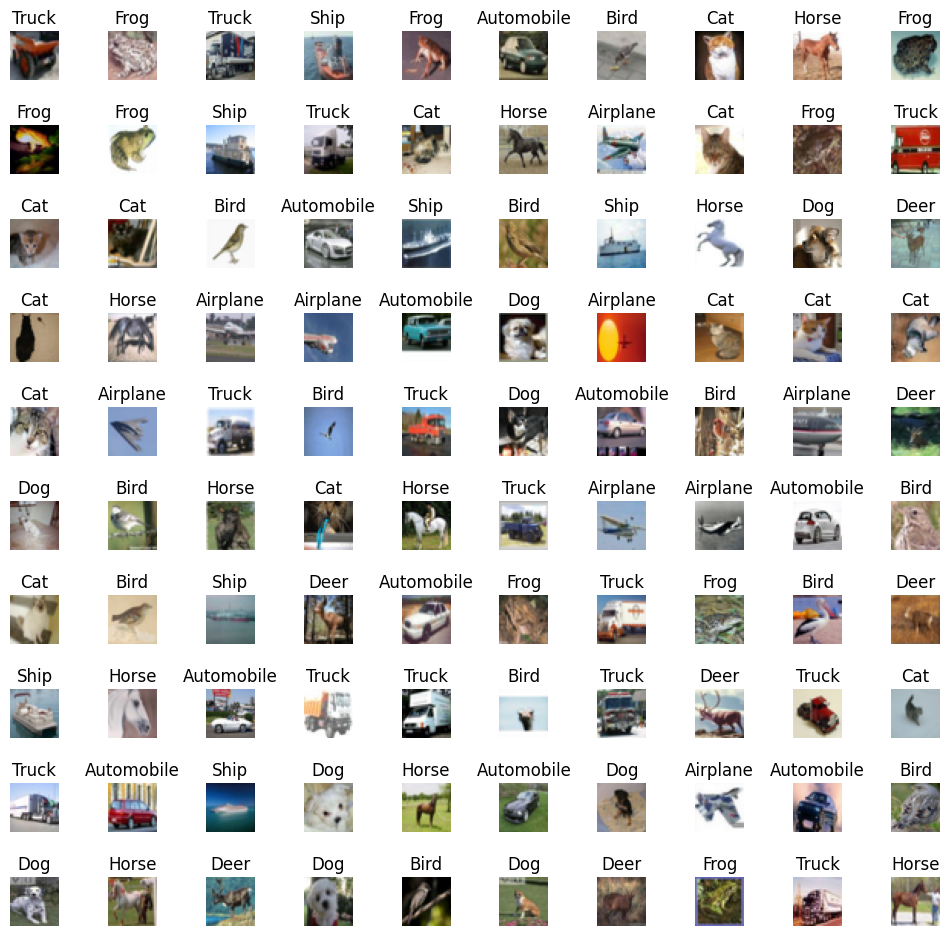

In [25]:
num_row = 10
num_col = 10
showImages(num_row,num_col,X =x_train,Y = y_train)

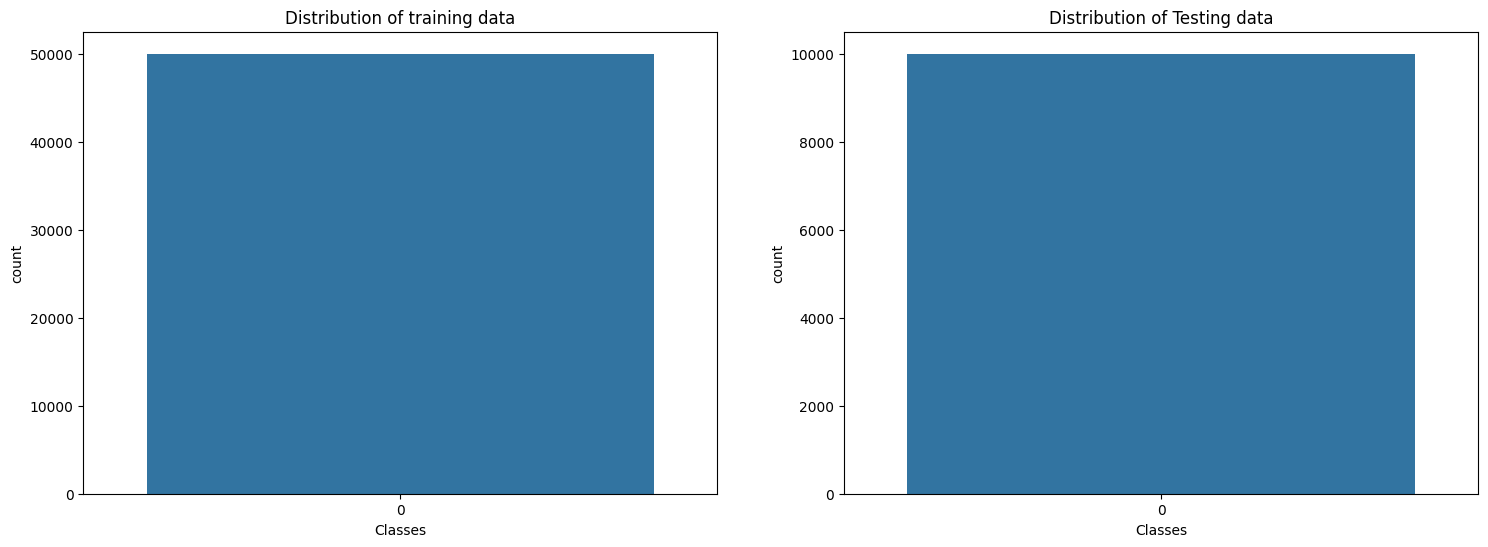

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


figure, axis = plt.subplots( 1, 2 , figsize = (18,6))
sns.countplot(y_train.ravel(),ax = axis[0])
axis[0].set_title('Distribution of training data')
axis[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axis[1])
axis[1].set_title('Distribution of Testing data')
axis[1].set_xlabel('Classes')
plt.show()

In [27]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255

In [28]:
import keras

y_train_one_hot = keras.utils.to_categorical(y_train, 10) #as classes = 10
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [29]:
print('The one hot label is: ', y_train_one_hot[1])
print(y_train_one_hot.shape)

The one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(50000, 10)


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [31]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation = 'softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

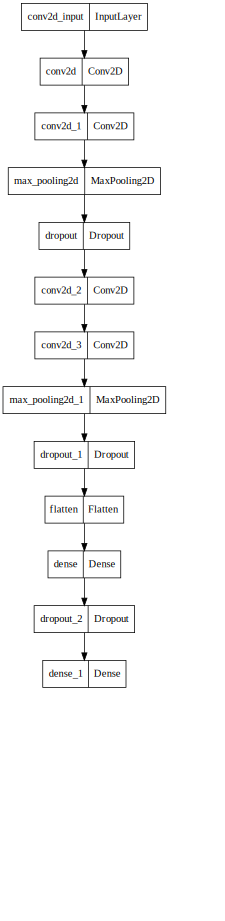

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [34]:
loss = 'categorical_crossentropy'
opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']

model.compile(loss = loss, optimizer = opt, metrics = metrics)

In [35]:
hist = model.fit(x_train, y_train_one_hot, batch_size = 64 , epochs = 100, validation_split = 0.2)

Epoch 1/100
625/625 [==============================] - 190s 302ms/step - loss: 1.7971 - accuracy: 0.3340 - val_loss: 1.3860 - val_accuracy: 0.4948
Epoch 2/100
625/625 [==============================] - 187s 299ms/step - loss: 1.4017 - accuracy: 0.4950 - val_loss: 1.1488 - val_accuracy: 0.5917
Epoch 3/100
625/625 [==============================] - 200s 320ms/step - loss: 1.2368 - accuracy: 0.5562 - val_loss: 1.0470 - val_accuracy: 0.6209
Epoch 4/100
625/625 [==============================] - 189s 302ms/step - loss: 1.1299 - accuracy: 0.5977 - val_loss: 0.9575 - val_accuracy: 0.6628
Epoch 5/100
625/625 [==============================] - 191s 305ms/step - loss: 1.0586 - accuracy: 0.6256 - val_loss: 0.8812 - val_accuracy: 0.6897
Epoch 6/100
625/625 [==============================] - 188s 301ms/step - loss: 1.0002 - accuracy: 0.6494 - val_loss: 0.8317 - val_accuracy: 0.7099
Epoch 7/100
625/625 [==============================] - 187s 299ms/step - loss: 0.9518 - accuracy: 0.6650 - val_loss: 0

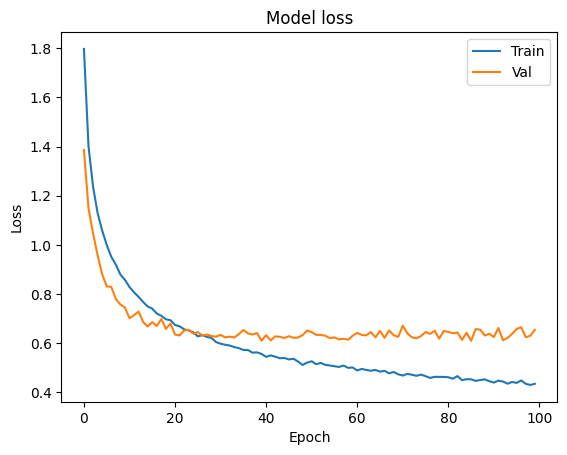

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

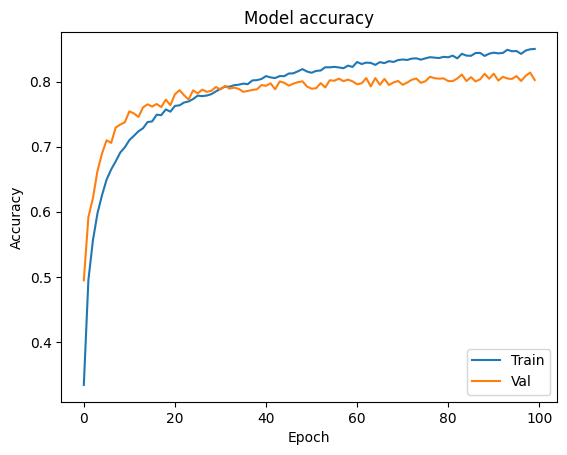

In [37]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [38]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 12s 38ms/step - loss: 0.6575 - accuracy: 0.8013


0.8012999892234802